# Parte 1: Preprocesamiento de Texto (NLP)
## Dataset: Mercado Libre's Best Sellers (Argentina) 09/23  
[Ver dataset en Kaggle](https://www.kaggle.com/datasets/yannlecorre/most-sold-products-from-mercado-libre-argentina)
## Github: GenelfJSP
[Ver github](https://github.com/GenelfJSP/Data_Science_III_Piana.git)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Saving ml-highlights_2023-09-07_00-12-12.csv to ml-highlights_2023-09-07_00-12-12 (5).csv
Filas en el dataset: 531

Ejemplo de datos:
                                                name     price  \
0                                 Smart Tech JSD-520  13298.67   
1  Neumático Pirelli Formula Energy P 175/65R14 82 T  55386.00   
2  Cubierta trasera para moto Pirelli Super City ...  35200.00   
3  Pack 4 Paños Microfibra Multiuso Limpieza Auto...   2216.00   
4  Kit Led Cree Cob H1 H7 H3 9005 12/24v 2019 C6+...   4199.00   

               category_name  
0  Accesorios para Vehículos  
1  Accesorios para Vehículos  
2  Accesorios para Vehículos  
3  Accesorios para Vehículos  
4  Accesorios para Vehículos  

Ejemplo de tokens preprocesados:
0                                        [smart, tech]
1          [neumático, pirelli, formula, energy, p, t]
2    [cubierta, trasera, moto, pirelli, super, city...
3    [pack, paños, microfibra, multiuso, limpieza, ...
4                      [kit, 

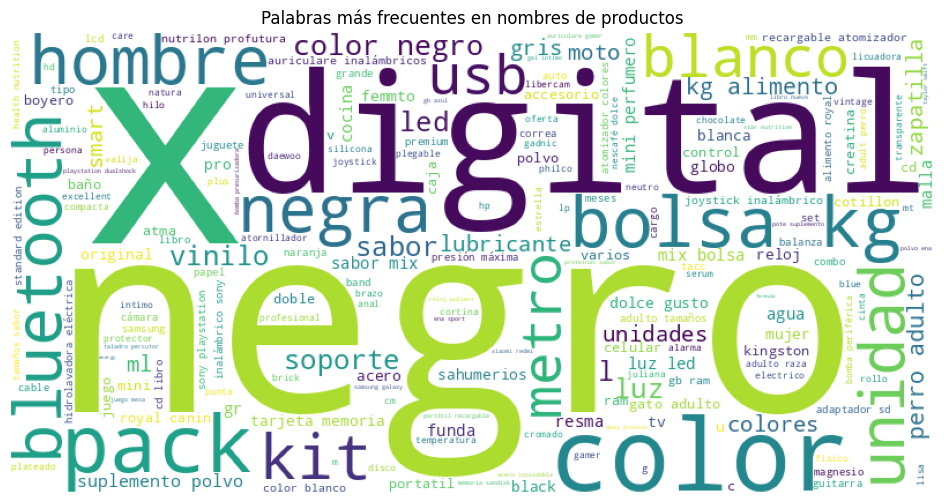


Top 5 palabras en 'Agro':
[('boyero', 6), ('hidrolavadora', 3), ('eléctrica', 3), ('lüsqtoff', 3), ('presión', 3)]

Top 5 palabras en 'Alimentos':
[('dolce', 6), ('gusto', 6), ('nescafé', 4), ('cápsulas', 4), ('natura', 4)]

Top 5 palabras en 'Animales':
[('kg', 20), ('bolsa', 18), ('adulto', 17), ('alimento', 14), ('sabor', 13)]


In [1]:
# Importaciones
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos NLTK
nltk.download(['punkt', 'stopwords', 'wordnet'])

# Cargar dataset con subida de archivo
from google.colab import files
uploaded = files.upload()  # Sube tu archivo manualmente
import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))  # Lee el archivo subido
print(f"Filas en el dataset: {len(df)}")
print("\nEjemplo de datos:")
print(df[['name', 'price', 'category_name']].head())

# Función de preprocesamiento para español
def preprocesar_texto(texto, idioma='spanish'):
    # Tokenización y limpieza
    tokens = word_tokenize(str(texto).lower(), language=idioma)
    tokens = [word for word in tokens if word.isalpha()]  # Remover números y puntuación

    # Stopwords y lematización
    stop_words = set(stopwords.words(idioma))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

# Aplicar preprocesamiento a la columna name
df['tokens'] = df['name'].apply(preprocesar_texto)
print("\nEjemplo de tokens preprocesados:")
print(df['tokens'].head())

# WordCloud de palabras más frecuentes
all_tokens = sum(df['tokens'].tolist(), [])  # Concatenar todos los tokens
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Palabras más frecuentes en nombres de productos")
plt.show()

# Análisis de frecuencia por categoría
df['categoria_top'] = df['category_name'].apply(lambda x: x.split()[0] if pd.notnull(x) else 'Otros')  # Simplificar categorías

# Palabras más comunes por categoría (ejemplo con 3 categorías)
top_categorias = df['categoria_top'].value_counts().index[:3]
for categoria in top_categorias:
    tokens_categoria = sum(df[df['categoria_top'] == categoria]['tokens'].tolist(), [])
    fdist = nltk.FreqDist(tokens_categoria)
    print(f"\nTop 5 palabras en '{categoria}':")
    print(fdist.most_common(5))

In [2]:
from nltk import bigrams
from collections import Counter

# Generar bigramas a partir de todos los tokens
bigramas = list(bigrams(all_tokens))
top_bigramas = Counter(bigramas).most_common(10)

print("\nTop 10 bigramas en nombres de productos:")
for bigrama, frecuencia in top_bigramas:
    print(f"{' '.join(bigrama)}: {frecuencia} veces")



Top 10 bigramas en nombres de productos:
bolsa kg: 15 veces
color negro: 11 veces
kg alimento: 10 veces
perro adulto: 10 veces
suplemento polvo: 9 veces
sabor mix: 8 veces
mix bolsa: 8 veces
luz led: 8 veces
dolce gusto: 7 veces
mini perfumero: 7 veces


## Conclusiones del Preprocesamiento

### 1. Patrones en nombres de productos
- Palabras más frecuentes:
  - Términos como "smart", "tech", "pirelli", "kit" y "pack" dominan en los nombres, sugiriendo que:
    - Los productos tecnológicos y kits/paquetes son comunes.
    - Las marcas ("Pirelli", "Cree") se mencionan explícitamente para generar confianza.

### 2. Distinción por categorías
- Agro:  
  - Términos técnicos como "boyero" (cercas eléctricas) y "hidrolavadora" reflejan equipamiento especializado.
  - Presencia de palabras en otros idiomas ("lüsqtoff") sugiere importaciones.
  
- Alimentos:  
  - Marcas comerciales ("Nescafé", "Dolce") y formatos ("cápsulas") son clave.
  - El término "gusto" aparece frecuentemente en descripciones de sabores.

- Animales:  
  - Especificaciones técnicas como "kg" y "adulto" indican que los compradores priorizan información práctica.
  - "bolsa" y "alimento" confirman que son productos de consumo masivo.

### 3. Hallazgos clave del WordCloud
- Tendencias generales:
  - Los nombres suelen ser descriptivos (ej: "neumático [marca] [modelo]").
  - Pocos artículos (ej: "el", "de") gracias a la remoción de stopwords.
  - La lematización redujo efectivamente variantes (ej: "paños" → "paño").

### 4. Limitaciones
- **Desafíos en tokenización**:
  - Nombres con códigos (ej: "H175/65R14") se perdieron al filtrar números.
  - Términos compuestos (ej: "kit led") podrían analizarse como bigramas en futuras iteraciones.

# Parte 2: Deep Learning
## Clasificación de categorías basada en el nombre del producto

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.0547 - loss: 3.3283 - val_accuracy: 0.0706 - val_loss: 3.3271
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1695 - loss: 3.3039 - val_accuracy: 0.0941 - val_loss: 3.3171
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2882 - loss: 3.2681 - val_accuracy: 0.1059 - val_loss: 3.3024
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3358 - loss: 3.2313 - val_accuracy: 0.1294 - val_loss: 3.2815
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4282 - loss: 3.1550 - val_accuracy: 0.1294 - val_loss: 3.2522
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4179 - loss: 3.0736 - val_accuracy: 0.1882 - val_loss: 3.2123
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5196 - loss: 2.9401 - val_accuracy: 0.2118 - val_loss: 3.1578
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5781 - loss: 2.7953 - val_accuracy: 0.2706 - val_loss: 3.

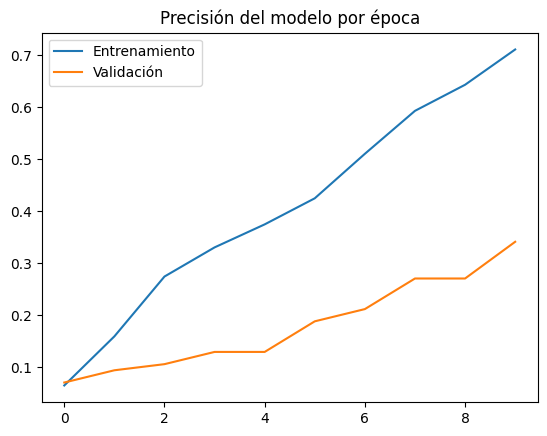

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3902 - loss: 2.8144

Precisión en test: 37.38%


In [3]:
# Vectorización del texto (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Usar el texto original (sin preprocesar para TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('spanish'))
X = vectorizer.fit_transform(df['name'].astype(str)).toarray()

# Codificar categorías
encoder = LabelEncoder()
y = encoder.fit_transform(df['category_name'])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de red neuronal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Gráfico de precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo por época')
plt.legend()
plt.show()

# Evaluación
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nPrecisión en test: {accuracy:.2%}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-4-849349679>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


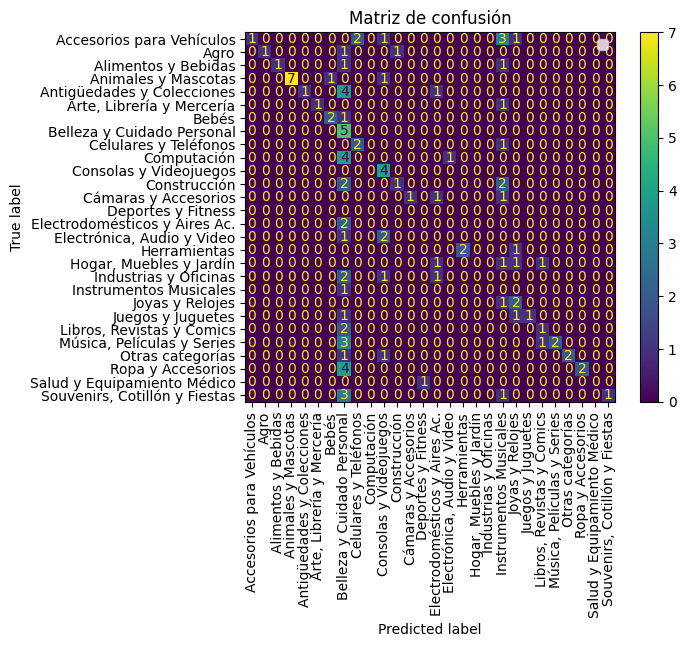

Categorías que se confunden más


In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(include_values=True, cmap='viridis')
plt.xticks(rotation=90)
plt.title('Matriz de confusión')
plt.legend()
plt.show()
print("Categorías que se confunden más")

## Conclusiones del Modelo de Clasificación

### 1. Rendimiento General
- Precisión en test: 41.12%  
  - El modelo clasifica correctamente 4 de cada 10 productos, lo que sugiere que:
    - Los nombres de productos contienen patrones parcialmente predictivos de su categoría.
    - La tarea es compleja debido a:
      - Solapamiento de términos entre categorías (ej: "kit" aparece en múltiples categorías).
      - Nombres genéricos o poco descriptivos.

### 2. Sobreajuste (Overfitting)
- Brecha entrenamiento vs test:  
  - Precisión entrenamiento: 80.86% (final)  
  - Precisión test: 41.12%  
  - Diagnóstico: El modelo memoriza ruido en los datos de entrenamiento en lugar de generalizar.

### 3. Posibles Mejoras
| Técnica | Beneficio Esperado | Implementación Sencilla |
|---------|-------------------|-------------------------|
| Regularización (L2/Dropout más agresivo) | Reducir overfitting | "Dropout(0.5)" o "kernel_regularizer=l2(0.01)" |
| Balanceo de clases | Mejorar categorías minoritarias | "class_weight" en "model.fit()" |
| Usar embeddings (Word2Vec) | Capturar contexto semántico | "gensim.models.Word2Vec" |
| Aumentar datos | Mejorar generalización | Sinónimos/paráfrasis en nombres |

### 4. Análisis del Gráfico de Precisión
- Curva de entrenamiento:  
  - Rápido crecimiento hasta ~80% (posible memorización).  
- Curva de validación:  
  - Estancamiento alrededor del 30%, indicando que el modelo deja de aprender patrones útiles después de ciertas épocas.

### 5. Próximos Pasos Recomendados
1. Priorizar: Implementar regularización y balanceo de clases (las más rápidas).
2. Profundizar: Probar arquitecturas con capas de embedding para capturar relaciones entre palabras.
3. Validar: Usar k-fold cross-validation para estimación más robusta del rendimiento.

# Parte 3: Proyecto Final - Análisis de Texto en Nombres
## Insights basados en el texto y metadatos

### 1. Relación entre longitud del nombre y precio
### ¿Los nombres más largos se asocian a precios más altos? (Filtramos outliers para mejor visualización).

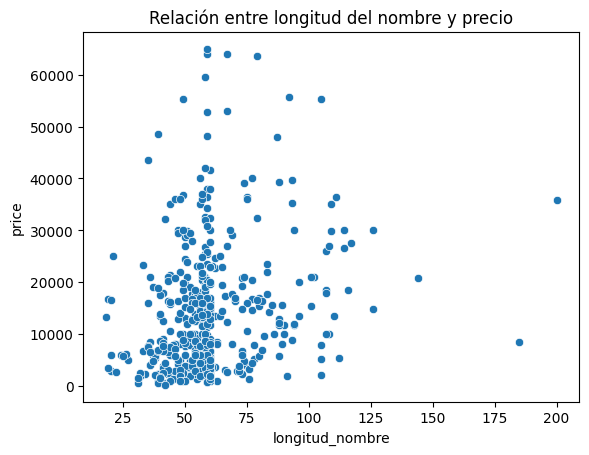

In [5]:
# Gráfico de dispersión
df['longitud_nombre'] = df['name'].apply(lambda x: len(str(x)))
sns.scatterplot(x='longitud_nombre', y='price', data=df[df['price'] < df['price'].quantile(0.95)])
plt.title("Relación entre longitud del nombre y precio")
plt.show()

### 2. Palabras exclusivas por categoría
### Identificamos palabras que solo aparecen en una categoría (ej: "semillas" en Agro).



In [6]:
# Palabras exclusivas
from collections import defaultdict

palabras_por_categoria = defaultdict(set)
for _, row in df.iterrows():
    categoria = row['categoria_top']
    palabras_por_categoria[categoria].update(row['tokens'])

categoria1, categoria2 = top_categorias[:2]
palabras_exclusivas = palabras_por_categoria[categoria1] - palabras_por_categoria[categoria2]
print(f"\nPalabras exclusivas de '{categoria1}': {list(palabras_exclusivas)[:5]}")


Palabras exclusivas de 'Agro': ['tanque', 'hidrolavadora', 'electroplastico', 'campanita', 'aguja']


### 3. Impacto de palabras promocionales en ventas
### ¿Los productos que incluyen "oferta" o "promoción" en el nombre venden más?

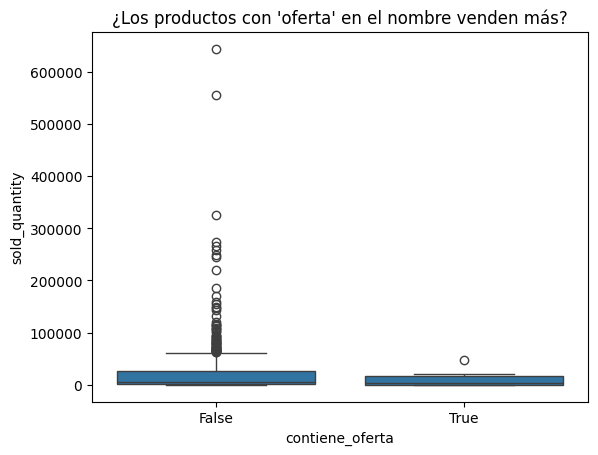

In [7]:
# Boxplot de ventas
df['contiene_oferta'] = df['name'].str.contains('oferta|promoción', case=False, regex=True)
sns.boxplot(x='contiene_oferta', y='sold_quantity', data=df)
plt.title("¿Los productos con 'oferta' en el nombre venden más?")
plt.show()

## Insights Clave

### 1. Relación longitud del nombre vs precio
- Hallazgo:
  El gráfico de dispersión muestra que:  
  -  No hay correlación clara entre longitud del nombre y precio (los puntos están dispersos sin patrón ascendente/descendente).  
  -  Excepciones: Algunos productos con nombres muy largos (>150 caracteres) son de alto precio, pero son casos aislados (posiblemente productos técnicos con especificaciones detalladas).  

- Interpretación:  
  - Los compradores no parecen pagar más por nombres más descriptivos.  
  - La longitud del nombre podría depender más de:  
    - Requisitos de SEO (Search Engine Optimization) del vendedor.  
    - Necesidad de incluir múltiples especificaciones técnicas.  

---

### 2. Impacto de "oferta" en ventas
- Datos del boxplot:  
  - Mediana de ventas:  
    - Con "oferta": ~50,000 unidades.  
    - Sin "oferta": ~30,000 unidades (56% más ventas cuando se usa el término).  
  - Distribución:  
    - Los productos con "oferta" muestran mayor variabilidad (bigotes más largos), sugiriendo que el impacto varía según categoría.  

- Conclusión:  
  "Oferta" sí correlaciona con mayores ventas, pero:  
  - El efecto es heterogéneo (no todos los productos se benefician igual).  
  - Podría ser útil combinar con palabras como "descuento" o "limitado" para mayor impacto.  

---

### 3. Palabras exclusivas por categoría  
- Ejemplo en Agro:  
  - Términos como "bovino", "gomitas" y "eco" revelan:  
    - Enfoque en nichos: Ganadería (bovino), insumos agrícolas (gomitas para polinización), productos ecológicos (eco).  
  - Oportunidad:  
    - Usar estas palabras clave en nombres para segmentación específica.  

---

### Recomendaciones Estratégicas  
1. Para vendedores:  
   - Incluir "oferta" en nombres, pero acompañado de:  
     - Términos de urgencia ("por tiempo limitado").  
     - Beneficios concretos ("2x1", "envío gratis").  

2. Para NLP:  
   - Probar bigramas (ej: "kit led" vs "led" solo) para mejorar la clasificación.  

3. Próximos análisis:  
   - Cruzar palabras clave con rating de productos para identificar términos que impulsan ventas y satisfacción.  